In [ ]:
#!pip install chart-studio

     |████████████████████████████████| 71kB 3.0MB/s 


In [ ]:
#!pip install cufflinks

In [ ]:
#bibliotecas padrao
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr

#biblioteca para manipulacao de datas
from astropy.time import Time

#biblioteca para plot estatico
import matplotlib.pyplot as plt
import seaborn as sns
#import matplotlib.ticker as mtick
#from matplotlib.ticker import PercentFormatter

#biblioteca para plot interativo
#import chart_studio.plotly as py
#import chart_studio.tools as tls
#import plotly.graph_objects as go
#import cufflinks as cf

#biblioteca para pegar dados do Drive


In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 17,6  #tamanho da figura de todos os plots

In [ ]:
#from google.colab import drive
#import os
#drive.mount('/content/gdrive', force_remount = True)
#path = '/content/gdrive/MyDrive/Colab Notebooks/OASIdata'
#os.chdir(path)

Mounted at /content/gdrive


In [ ]:
#tls.set_credentials_file(username = 'taaaticorrea', api_key = 'cVyxkyjPvCNzCDggVzsn')

# **INMT - FLORESTA A351 (2011-2019)**

## **TODAS**

In [ ]:
df = pd.read_csv('/content/dados_A351_D_2011-01-01_2019-12-31.csv',
                 sep = ';', skiprows = 10)
df.head()

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)",Unnamed: 3
0,2011-01-01,0,"47,666667",NaN
1,2011-01-02,0,"52,75",NaN
2,2011-01-03,11,"68,833333",NaN
3,2011-01-04,0,"58,166667",NaN
4,2011-01-05,0,"51,75",NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 4 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Data Medicao                                   3287 non-null   object 
 1   PRECIPITACAO TOTAL, DIARIO (AUT)(mm)           3142 non-null   object 
 2   UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)  3093 non-null   object 
 3   Unnamed: 3                                     0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 102.8+ KB


In [ ]:
del df['Unnamed: 3']
df.columns = ['Date','Rain','Hum']

In [ ]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3063 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3063 non-null   object
 1   Rain    3063 non-null   object
 2   Hum     3063 non-null   object
dtypes: object(3)
memory usage: 95.7+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
#comentado para pegar os dados e salvar num arquivo com os dados do oasi
#df['Date'] = Time(df['Date'], scale = 'utc', precision = 3)

In [ ]:
df['Rain'] = [i.replace(',', '.') for i in df['Rain']]
df['Rain'] = df['Rain'].astype('float64')

In [ ]:
df['Hum'] = [i.replace(',', '.') for i in df['Hum']]
df['Hum'] = df['Hum'].astype('float64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3063 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3063 non-null   datetime64[ns]
 1   Rain    3063 non-null   float64       
 2   Hum     3063 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 95.7 KB


In [ ]:
df_2011 = df.set_index('Date').filter(like = '2011', axis = 0).reset_index()
df_2012 = df.set_index('Date').filter(like = '2012', axis = 0).reset_index()
df_2013 = df.set_index('Date').filter(like = '2013', axis = 0).reset_index()
df_2014 = df.set_index('Date').filter(like = '2014', axis = 0).reset_index()
df_2015 = df.set_index('Date').filter(like = '2015', axis = 0).reset_index()
df_2016 = df.set_index('Date').filter(like = '2016', axis = 0).reset_index()
df_2017 = df.set_index('Date').filter(like = '2017', axis = 0).reset_index()
df_2018 = df.set_index('Date').filter(like = '2018', axis = 0).reset_index()
df_2019 = df.set_index('Date').filter(like = '2019', axis = 0).reset_index()

In [ ]:
### criando objeto datetime para cado ano individualmente

#Inicio das observaçoes
it    = '2011-01-01 00:00:00'
#transformando em objeto Time do astropy
itime = Time(it, format = 'iso', scale = 'utc', precision = 3 )

#inicializando listas vazias
dt_2011 = []
dt_2012 = []
dt_2013 = []
dt_2014 = []
dt_2015 = []
dt_2016 = []
dt_2017 = []
dt_2018 = []
dt_2019 = []

dt_2011 = [ (i - itime)/365 for i in df_2011['Date']]
dt_2012 = [ (i - itime)/365 for i in df_2012['Date']]
dt_2013 = [ (i - itime)/365 for i in df_2013['Date']]
dt_2014 = [ (i - itime)/365 for i in df_2014['Date']]
dt_2015 = [ (i - itime)/365 for i in df_2015['Date']]
dt_2016 = [ (i - itime)/365 for i in df_2016['Date']]
dt_2017 = [ (i - itime)/365 for i in df_2017['Date']]
dt_2018 = [ (i - itime)/365 for i in df_2018['Date']]
dt_2019 = [ (i - itime)/365 for i in df_2019['Date']]

In [ ]:
df_2011['Date'][0]

Timestamp('2011-01-01 00:00:00')

In [ ]:
#transformando float object para fazer o plot
dt_2011 = [dt_2011[i].value for i in range(len(dt_2011))]
dt_2012 = [dt_2012[i].value for i in range(len(dt_2012))]
dt_2013 = [dt_2013[i].value for i in range(len(dt_2013))]
dt_2014 = [dt_2014[i].value for i in range(len(dt_2014))]
dt_2015 = [dt_2015[i].value for i in range(len(dt_2015))]
dt_2016 = [dt_2016[i].value for i in range(len(dt_2016))]
dt_2017 = [dt_2017[i].value for i in range(len(dt_2017))]
dt_2018 = [dt_2018[i].value for i in range(len(dt_2018))]
dt_2019 = [dt_2019[i].value for i in range(len(dt_2019))]

<ipython-input-543-11975d2c3dcd>:31: UserWarning:

FixedFormatter should only be used together with FixedLocator



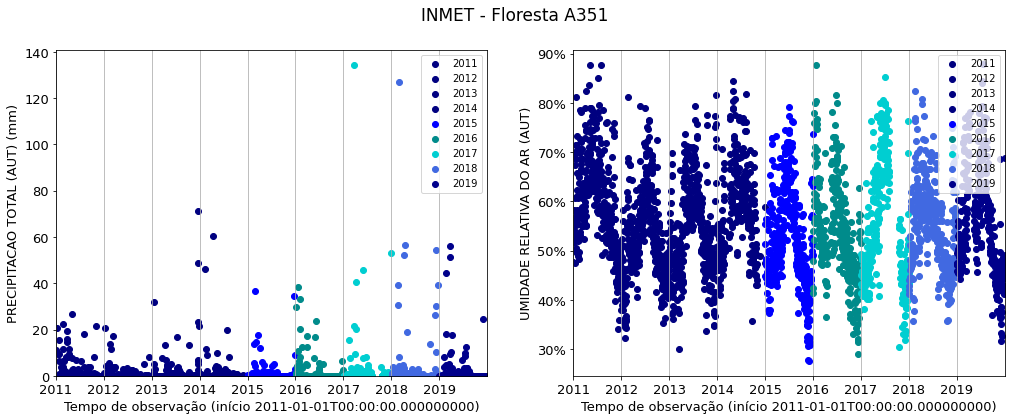

In [ ]:
plt.subplot(121)
plt.scatter(dt_2011,df_2011['Rain'], label = 2011, color = 'navy')
plt.scatter(dt_2012,df_2012['Rain'], label = 2012, color = 'navy')
plt.scatter(dt_2013,df_2013['Rain'], label = 2013, color = 'navy')
plt.scatter(dt_2014,df_2014['Rain'], label = 2014, color = 'navy')
plt.scatter(dt_2015,df_2015['Rain'], label = 2015, color = 'blue')
plt.scatter(dt_2016,df_2016['Rain'], label = 2016, color = 'darkcyan')
plt.scatter(dt_2017,df_2017['Rain'], label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018,df_2018['Rain'], label = 2018, color = 'royalblue')
plt.scatter(dt_2019,df_2019['Rain'], label = 2019, color = 'darkblue')
plt.xlabel('Tempo de observação ' + '(início ' + str(df['Date'][0]) + ')' ,size = 13)
plt.ylabel('PRECIPITACAO TOTAL (AUT) (mm)',size = 13)
plt.xticks(np.arange(0,9,1),['2011','2012','2013','2014','2015','2016','2017','2018','2019'], rotation = 0, size = 13)
plt.yticks(size = 13)
plt.xlim(0,9)
plt.ylim(bottom = 0)
plt.grid(axis = 'x')
plt.legend()
plt.savefig('precipitacao_2011-2019.png')

plt.subplot(122)
plt.scatter(dt_2011,df_2011['Hum'], label = 2011, color = 'navy')
plt.scatter(dt_2012,df_2012['Hum'], label = 2012, color = 'navy')
plt.scatter(dt_2013,df_2013['Hum'], label = 2013, color = 'navy')
plt.scatter(dt_2014,df_2014['Hum'], label = 2014, color = 'navy')
plt.scatter(dt_2015,df_2015['Hum'], label = 2015, color = 'blue')
plt.scatter(dt_2016,df_2016['Hum'], label = 2016, color = 'darkcyan')
plt.scatter(dt_2017,df_2017['Hum'], label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018,df_2018['Hum'], label = 2018, color = 'royalblue')
plt.scatter(dt_2019,df_2019['Hum'], label = 2019, color = 'darkblue')
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])  #porcentagem
plt.xlabel('Tempo de observação ' + '(início ' + str(df['Date'][0]) + ')', size = 13)
plt.ylabel('UMIDADE RELATIVA DO AR (AUT)', size = 13)
plt.xlim(0,9)
plt.xticks(np.arange(0,9,1),['2011','2012','2013','2014','2015','2016','2017','2018','2019'], rotation = 0, size = 13)
plt.yticks(size  = 13)
plt.grid(axis = 'x')
plt.legend()

plt.suptitle('INMET - Floresta A351', size = 17)
plt.savefig('umidade_2011-2019.png')



plt.savefig('floresta_2011-2019.png')
plt.show()

# **INMT - FLORESTA A351 (2011-2019) (PLOTLY)**

## **TODAS**

In [ ]:
df = pd.read_csv('dados-meteorologicos/diario/dados_A351_D_2011-01-01_2019-12-31.csv',
                 sep = ';', skiprows = 10)
df.head()

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)",Unnamed: 3
0,2011-01-01,0,"47,666667",NaN
1,2011-01-02,0,"52,75",NaN
2,2011-01-03,11,"68,833333",NaN
3,2011-01-04,0,"58,166667",NaN
4,2011-01-05,0,"51,75",NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 4 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Data Medicao                                   3287 non-null   object 
 1   PRECIPITACAO TOTAL, DIARIO (AUT)(mm)           3142 non-null   object 
 2   UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)  3093 non-null   object 
 3   Unnamed: 3                                     0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 102.8+ KB


In [ ]:
del df['Unnamed: 3']
df.columns = ['Date','Rain','Hum']

In [ ]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3063 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3063 non-null   object
 1   Rain    3063 non-null   object
 2   Hum     3063 non-null   object
dtypes: object(3)
memory usage: 95.7+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Rain'] = [i.replace(',', '.') for i in df['Rain']]
df['Rain'] = df['Rain'].astype('float64')

In [ ]:
df['Hum'] = [i.replace(',', '.') for i in df['Hum']]
df['Hum'] = df['Hum'].astype('float64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3063 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3063 non-null   datetime64[ns]
 1   Rain    3063 non-null   float64       
 2   Hum     3063 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 95.7 KB


In [ ]:
df.set_index('Date', inplace = True)
df.head()

,Rain,Hum
Date,,
2011-01-01,0.0,47.666667
2011-01-02,0.0,52.750000
2011-01-03,11.0,68.833333
2011-01-04,0.0,58.166667
2011-01-05,0.0,51.750000


In [ ]:
df['Rain'].iplot(kind = 'scatter',
                mode = 'markers',
                title = 'INMET - Estação Floresta A351',
                xTitle = 'Data da observação',
                yTitle = 'Precipitação total (AUT) (mm)', )

In [ ]:
df['Hum'].iplot(kind = 'scatter',
                mode = 'markers',
                title = 'INMET - Estação Floresta A351',
                xTitle = 'Data da observação',
                yTitle = 'Umidade Relativa do Ar (AUT) %', )

In [ ]:
df_2011 = df.filter(like = '2011', axis = 0)
df_2012 = df.filter(like = '2012', axis = 0)
df_2013 = df.filter(like = '2013', axis = 0)
df_2014 = df.filter(like = '2014', axis = 0)
df_2015 = df.filter(like = '2015', axis = 0)
df_2016 = df.filter(like = '2016', axis = 0)
df_2017 = df.filter(like = '2017', axis = 0)
df_2018 = df.filter(like = '2018', axis = 0)
df_2019 = df.filter(like = '2019', axis = 0)

# **Dados OASI**

In [ ]:
#importando dados
df_OASI = pd.read_csv('/content/Data_Todo.txt',delimiter = '\t', skiprows = 1,
                      usecols = ['Date','Unnamed: 1','Hum','Rain'])
print(df_OASI.info())
df_OASI.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235640 entries, 0 to 235639
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Date        235640 non-null  object 
 1   Unnamed: 1  235640 non-null  object 
 2   Hum         235640 non-null  object 
 3   Rain        235640 non-null  float64
dtypes: float64(1), object(3)
memory usage: 7.2+ MB
None


,Date,Unnamed: 1,Hum,Rain
0,03/09/14,7:02,20.6,0.0
1,03/09/14,7:03,20.6,0.0
2,03/09/14,7:04,20.6,0.0
3,03/09/14,7:05,20.6,0.0
4,03/09/14,7:06,20.6,0.0


In [ ]:
df_OASI.to_csv('dados_2014-2018_OASI')

In [ ]:
# arrumando especificidades do arquivo
df_OASI['Datetime'] = df_OASI['Date'] + ' ' + df_OASI['Unnamed: 1']
del df_OASI['Unnamed: 1']
del df_OASI['Date']

In [ ]:
#convertendo a data em um objeto datetime do pandas
df_OASI['Datetime'] = pd.to_datetime(df_OASI['Datetime'], format = '%d/%m/%y %H:%M')

#convertendo a data em um objeto datetime do astropy
df_OASI['Datetime'] = Time(df_OASI['Datetime'], scale = 'utc')

In [ ]:
#transformando valores de umidade em float
#df_OASI['Hum'] = df_OASI['Hum'].astype('float64')

#pegando apenas os valores de umidade diferentes de '---'
df_OASI = df_OASI.loc[(df_OASI['Hum']) != '---', :]

#transformando a coluna de humidade em float
df_OASI.Hum = df_OASI.Hum.astype('float64')

In [ ]:
df_OASI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191622 entries, 0 to 235639
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Hum       191622 non-null  float64
 1   Rain      191622 non-null  float64
 2   Datetime  191622 non-null  object 
dtypes: float64(2), object(1)
memory usage: 5.8+ MB


## **TODAS**

In [ ]:
#filtrando dados por ano -- o método .filter() filtra por indice
df_OASI_2014 = df_OASI.set_index('Datetime').filter(like='2014-',axis=0).reset_index()
df_OASI_2015 = df_OASI.set_index('Datetime').filter(like='2015-',axis=0).reset_index()
df_OASI_2016 = df_OASI.set_index('Datetime').filter(like='2016-',axis=0).reset_index()
df_OASI_2017 = df_OASI.set_index('Datetime').filter(like='2017-',axis=0).reset_index()
df_OASI_2018 = df_OASI.set_index('Datetime').filter(like='2018-',axis=0).reset_index()

In [ ]:
### criando objeto datetime para cado ano individualmente

#Inicio das observaçoes
it    = '2014-01-01 00:00:00'
#transformando em objeto Time do astropy
itime = Time(it, format = 'iso', scale = 'utc' )

#inicializando listas vazias
dt_2014 = []
dt_2015 = []
dt_2016 = []
dt_2017 = []
dt_2018 = []

dt_2014 = [ (i - itime)/365 for i in df_OASI_2014['Datetime']]
dt_2015 = [ (i - itime)/365 for i in df_OASI_2015['Datetime']]
dt_2016 = [ (i - itime)/365 for i in df_OASI_2016['Datetime']]
dt_2017 = [ (i - itime)/365 for i in df_OASI_2017['Datetime']]
dt_2018 = [ (i - itime)/365 for i in df_OASI_2018['Datetime']]

In [ ]:
dt_2014[0]

In [ ]:
#transformando float object para fazer o plot
dt_2014 = [dt_2014[i].value for i in range(len(dt_2014))]
dt_2015 = [dt_2015[i].value for i in range(len(dt_2015))]
dt_2016 = [dt_2016[i].value for i in range(len(dt_2016))]
dt_2017 = [dt_2017[i].value for i in range(len(dt_2017))]
dt_2018 = [dt_2018[i].value for i in range(len(dt_2018))]

In [ ]:
dt_2014[0]

In [ ]:
plt.subplot(121)
plt.scatter(dt_2014,df_OASI_2014['Rain'], label = 2014, color = 'navy')
plt.scatter(dt_2015,df_OASI_2015['Rain'], label = 2015, color = 'blue')
plt.scatter(dt_2016,df_OASI_2016['Rain'], label = 2016, color = 'darkcyan')
plt.scatter(dt_2017,df_OASI_2017['Rain'], label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018,df_OASI_2018['Rain'], label = 2018, color = 'royalblue')
plt.title(r'Precipitação', size = 13)
plt.xlabel('Tempo de observação ' + '(início ' + str(df_OASI['Datetime'][0]) + ')' ,size = 13)
plt.ylabel('PRECIPITACAO TOTAL (AUT) (mm)',size = 13)
plt.xticks(np.arange(0,6),['2014','2015','2016','2017','2018','2019'], rotation = 0, size = 13)
plt.yticks(size = 13)
plt.xlim(0,5)
plt.ylim(bottom = 0)
plt.grid(axis = 'x')
plt.legend()
plt.savefig('precipitacao_2014-2018_OASI.png')

plt.subplot(122)
plt.scatter(dt_2014,df_OASI_2014['Hum'], label = 2014, color = 'navy')
plt.scatter(dt_2015,df_OASI_2015['Hum'], label = 2015, color = 'blue')
plt.scatter(dt_2016,df_OASI_2016['Hum'], label = 2016, color = 'darkcyan')
plt.scatter(dt_2017,df_OASI_2017['Hum'], label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018,df_OASI_2018['Hum'], label = 2018, color = 'royalblue')
#plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])  #porcentagem
plt.title(r'Umidade relativa', size = 13)
plt.xlabel('Tempo de observação ' + '(início ' + str(df_OASI['Datetime'][0]) + ')', size = 13)
plt.ylabel('UMIDADE RELATIVA DO AR (AUT)', size = 13)
plt.xlim(0,5)
plt.xticks(np.arange(0,6,1),['2014','2015','2016','2017','2018','2019'], rotation = 0, size = 13)
plt.yticks(size  = 13)
plt.grid(axis = 'x')
plt.legend()

plt.suptitle('OASI', size = 17)
plt.savefig('umidade_2014-2018_OASI.png')

plt.show()

## **INDIVIDUAL**

### **2014**

In [ ]:
#tempos para plotar apenas o ano de 2014
dt_2014 = [dt_2014[i]*365/30 for i in range(len(dt_2014))]

In [ ]:
plt.subplot(121)
plt.scatter(dt_2014,df_OASI_2014['Rain'], label = '2014', color = 'navy')
plt.xlabel('Tempo de observação ' + '(início ' + str(df_OASI_2014['Datetime'][0]) + ')', size = 13)
plt.ylabel('PRECIPITACAO TOTAL (AUT) (mm)',size=13)
plt.ylim(bottom = 0, top = 120)
plt.xlim(-1,11)
plt.xticks(np.arange(-1,11),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.yticks(size = 13)
plt.grid(axis = 'x')
plt.legend()
plt.savefig('precipitacao_OASI-2014.png')

plt.subplot(122)
plt.scatter(dt_2014,df_OASI_2014['Hum'], label = '2014', color = 'navy')
plt.xlabel('Tempo de observação ' + '(início ' + str(df_OASI_2014['Datetime'][0]) + ')',size = 13)
plt.ylabel('UMIDADE',size=13)
#plt.ylim(bottom = 0, top = 120)
plt.xlim(-1,11)
plt.xticks(np.arange(-1,11),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.grid(axis = 'x')
plt.legend()

plt.suptitle('OASI - 2014', size = 17)
plt.savefig('umidade_OASI-2014.png')


plt.savefig('OASI-2014.png')
plt.show

In [ ]:
#inicializando listas
dt_2015 = []
dt_2016 = []
dt_2017 = []
dt_2018 = []

#Inicio das observaçoes
it = '2015-01-01 00:00:00'
itime = Time(it, format = 'iso', scale = 'utc' )
dt_2015 = [ (i - itime)/30 for i in df_OASI_2015['Datetime']]

#Inicio das observaçoes
it = '2016-01-01 00:00:00'
itime = Time(it, format = 'iso', scale = 'utc' )
dt_2016 = [ (i - itime)/30 for i in df_OASI_2016['Datetime']]

#Inicio das observaçoes
it = '2017-01-01 00:00:00'
itime = Time(it, format = 'iso', scale = 'utc' )
dt_2017 = [ (i - itime)/30 for i in df_OASI_2017['Datetime']]

#Inicio das observaçoes
it = '2018-01-01 00:00:00'
itime = Time(it, format = 'iso', scale = 'utc' )
dt_2018 = [ (i - itime)/30 for i in df_OASI_2018['Datetime']]


dt_2015 = [dt_2015[i].value for i in range(len(dt_2015))]
dt_2016 = [dt_2016[i].value for i in range(len(dt_2016))]
dt_2017 = [dt_2017[i].value for i in range(len(dt_2017))]
dt_2018 = [dt_2018[i].value for i in range(len(dt_2018))]

### **2015**

In [ ]:
plt.subplot(121)
plt.scatter(dt_2015,df_OASI_2015['Rain'], label = '2015', color = 'blue')
plt.xlabel('Tempo de observação ' + '(início ' + str(df_OASI_2015['Datetime'][0]) + ')',size = 13)
plt.ylabel('PRECIPITACAO TOTAL (AUT) (mm)',size=13)
plt.ylim(bottom = 0, top = 5)
plt.xlim(-1,11)
plt.xticks(np.arange(-1,11),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.yticks(size = 13)
plt.grid(axis = 'x')
plt.legend()
plt.savefig('precipitacao_OASI-2015.png')


plt.subplot(122)
plt.scatter(dt_2015,df_OASI_2015['Hum'], label = '2015', color = 'blue')
plt.xlabel('Tempo de observação ' + '(início ' + str(df_OASI_2015['Datetime'][0]) + ')',size = 13)
plt.ylabel('UMIDADE',size = 13)
#plt.ylim(bottom = 0, top = 120)
plt.xlim(-1,11)
plt.xticks(np.arange(-1,11),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.yticks(size = 13)
plt.grid(axis = 'x')
plt.legend()


plt.suptitle('OASI', size = 17)
plt.savefig('umidade_OASI-2015.png')

plt.savefig('OASI-2015.png')
plt.show

### **2016**

In [ ]:
plt.subplot(121)
plt.scatter(dt_2016,df_OASI_2016['Rain'], label = '2016', color = 'darkcyan')
plt.xlabel('Tempo de observação ' + '(início ' + str(df_OASI_2016['Datetime'][0]) + ')',size = 13)
plt.ylabel('PRECIPITACAO TOTAL (AUT) (mm)',size=13)
plt.ylim(0)
plt.xlim(-1,11)
plt.xticks(np.arange(-1,11),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.yticks(size = 13)
plt.grid(axis = 'x')
plt.legend()
plt.savefig('precipitacao_OASI-2016.png')


plt.subplot(122)
plt.scatter(dt_2016,df_OASI_2016['Hum'], label = '2016', color = 'darkcyan')
plt.xlabel('Tempo de observação ' + '(início ' + str(df_OASI_2016['Datetime'][0]) + ')',size = 13)
plt.ylabel('UMIDADE',size=13)
#plt.ylim(bottom = 0, top = 120)
plt.xlim(-1,11)
plt.xticks(np.arange(-1,11),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.yticks(size = 13)
plt.grid(axis = 'x')
plt.legend()
plt.savefig('umidade_OASI-2016.png')

plt.suptitle('OASI - 2016', size = 17)

plt.savefig('OASI-2016.png')
plt.show

### **2017**

In [ ]:
plt.subplot(121)
plt.scatter(dt_2017,df_OASI_2017['Rain'], label = '2017', color = 'darkturquoise')
plt.xlabel('Tempo de observação ' + '(início ' + str(df_OASI_2017['Datetime'][0]) + ')', size = 13)
plt.ylabel('PRECIPITACAO TOTAL (AUT) (mm)',size=13)
plt.ylim(bottom = 0, top = 1)
plt.xlim(-1,11)
plt.xticks(np.arange(-1,11),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.yticks(size = 13)
plt.grid(axis = 'x')
plt.legend()
plt.savefig('precipitacao_OASI-2017.png')


plt.subplot(122)
plt.scatter(dt_2017,df_OASI_2017['Hum'], label = '2017', color = 'darkturquoise')
plt.xlabel('Tempo de observação ' + '(início ' + str(df_OASI_2017['Datetime'][0]) + ')',size = 13)
plt.ylabel('UMIDADE',size=13)
#plt.ylim(bottom = 0, top = 120)
plt.xlim(-1,11)
plt.xticks(np.arange(-1,11),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.yticks(size = 13)
plt.grid(axis = 'x')lecyccs@hotmail.com
plt.legend()
plt.savefig('umidade_OASI-2017.png')


plt.suptitle('OASI - 2017', size = 17)

plt.savefig('OASI-2017.png')
plt.show

### **2018**

In [ ]:
plt.subplot(121)
plt.scatter(dt_2018,df_OASI_2018['Hum'], label = '2018', color = 'royalblue')
plt.xlabel('Tempo de observação ' + '(início ' + str(df_OASI_2018['Datetime'][0]) + ')',size = 13)
plt.ylabel('UMIDADE',size=13)
#plt.ylim(bottom = 0, top = 120)
plt.xlim(-1,11)
plt.xticks(np.arange(-1,11),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.yticks(size = 13)
plt.grid(axis = 'x')
plt.legend()
plt.savefig('umidade_OASI-2018.png')

plt.subplot(122)
plt.scatter(dt_2018,df_OASI_2018['Rain'], label = '2018', color = 'royalblue')
plt.xlabel('Tempo de observação ' + '(início ' + str(df_OASI_2018['Datetime'][0]) + ')',size = 13)
plt.ylabel('PRECIPITACAO TOTAL (AUT) (mm)',size=13)
plt.ylim(bottom = 0, top = 30)
plt.xlim(-1,11)
plt.xticks(np.arange(-1,11),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.yticks(size = 13)
plt.grid(axis = 'x')
plt.legend()
plt.savefig('precipitacao_OASI-2018.png')

plt.suptitle('OASI - 2018', size = 17)

plt.savefig('OASI-2018.png')
plt.show

## **MÉDIA DIÁRIA**

In [ ]:
df_OASI

,Hum,Rain,Datetime
0,20.6,0.0,2014-09-03T07:02:00.000000000
1,20.6,0.0,2014-09-03T07:03:00.000000000
2,20.6,0.0,2014-09-03T07:04:00.000000000
3,20.6,0.0,2014-09-03T07:05:00.000000000
4,20.6,0.0,2014-09-03T07:06:00.000000000
...,...,...,...
235635,20.8,0.0,2018-12-06T22:21:00.000000000
235636,20.8,0.0,2018-12-06T22:22:00.000000000
235637,20.8,0.0,2018-12-06T22:23:00.000000000
235638,20.8,0.0,2018-12-06T22:24:00.000000000


In [ ]:
df_OASI['Datetime'][0]

<Time object: scale='utc' format='datetime64' value=2014-09-03T07:02:00.000000000>

In [ ]:
#df_OASI['Datetime'] = pd.to_datetime(df_OASI['Datetime'], utc = True)

df_OASI['Datetime'] = pd.to_datetime(df_OASI['Datetime'].astype(str))
df_OASI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191622 entries, 0 to 235639
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Hum       191622 non-null  float64       
 1   Rain      191622 non-null  float64       
 2   Datetime  191622 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2)
memory usage: 10.8 MB


In [ ]:
#media anual
dados_ano = df_OASI[['Hum','Rain']].groupby(by = df_OASI.Datetime.dt.year).mean()
dados_ano

,Hum,Rain
Datetime,,
2014,18.335265,0.092098
2015,18.662533,0.002265
2016,18.361734,0.000000
2017,18.930721,0.000000
2018,19.552497,0.033323


In [ ]:
#media diaria
dados_dia = df_OASI.groupby(by = df_OASI.Datetime.dt.date).mean()
dados_dia

,Hum,Rain
Datetime,,
2014-09-03,19.632025,0.000000
2014-09-04,18.822053,0.000000
2014-09-05,17.611506,0.000000
2014-09-06,17.684167,0.000000
2014-09-07,17.304258,0.000000
...,...,...
2018-12-01,20.000278,0.067686
2018-12-02,21.920764,0.722639
2018-12-03,21.132015,0.000000


In [ ]:
dados_dia.head()

,Hum,Rain
Datetime,,
2014-09-03,19.632025,0.0
2014-09-04,18.822053,0.0
2014-09-05,17.611506,0.0
2014-09-06,17.684167,0.0
2014-09-07,17.304258,0.0


In [ ]:
dados_dia.to_csv('dados_media-diaria_OASI')

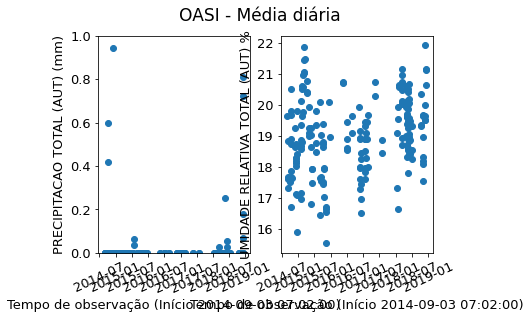

In [ ]:
plt.subplot(121)
plt.scatter(dados_dia.index.values,dados_dia['Rain'])
plt.yticks(size = 13)
plt.xticks(rotation = 25, size = 13)
plt.ylim(0,1.0)
plt.ylabel('PRECIPITACAO TOTAL (AUT) (mm)', size = 13)
plt.xlabel('Tempo de observação' + ' (Início ' + str(df_OASI['Datetime'][0]) + ')', size = 13)


plt.subplot(122)
plt.yticks(size = 13)
plt.scatter(dados_dia.index, dados_dia['Hum'])
plt.xticks(rotation = 25, size = 13)
plt.ylabel('UMIDADE RELATIVA TOTAL (AUT) %', size = 13)
plt.xlabel('Tempo de observação' + ' (Início ' + str(df_OASI['Datetime'][0]) + ')', size = 13)


plt.suptitle('OASI - Média diária', size = 17)
plt.show()

### **OASI + Floresta A351**

In [ ]:
df.head()

,Date,Rain,Hum
0,2011-01-01,0.0,47.666667
1,2011-01-02,0.0,52.750000
2,2011-01-03,11.0,68.833333
3,2011-01-04,0.0,58.166667
4,2011-01-05,0.0,51.750000


In [ ]:
df.columns = ['Datetime', 'Rain (Floresta)', 'Hum (Floresta)']
df.head()

,Datetime,Rain (Floresta),Hum (Floresta)
0,2011-01-01,0.0,47.666667
1,2011-01-02,0.0,52.750000
2,2011-01-03,11.0,68.833333
3,2011-01-04,0.0,58.166667
4,2011-01-05,0.0,51.750000


In [ ]:
df.dtypes

Datetime           datetime64[ns]
Rain (Floresta)           float64
Hum (Floresta)            float64
dtype: object

In [ ]:
dados_dia.head()

,Hum,Rain
Datetime,,
2014-09-03,19.632025,0.0
2014-09-04,18.822053,0.0
2014-09-05,17.611506,0.0
2014-09-06,17.684167,0.0
2014-09-07,17.304258,0.0


In [ ]:
dados_dia = dados_dia.reset_index()
dados_dia.head()

,Datetime,Hum,Rain
0,2014-09-03,19.632025,0.0
1,2014-09-04,18.822053,0.0
2,2014-09-05,17.611506,0.0
3,2014-09-06,17.684167,0.0
4,2014-09-07,17.304258,0.0


In [ ]:
dados_dia.columns = ['Datetime', 'Hum (OASI)', 'Rain (OASI)']
dados_dia.head()

,Datetime,Hum (OASI),Rain (OASI)
0,2014-09-03,19.632025,0.0
1,2014-09-04,18.822053,0.0
2,2014-09-05,17.611506,0.0
3,2014-09-06,17.684167,0.0
4,2014-09-07,17.304258,0.0


In [ ]:
dados_dia['Datetime'] = pd.to_datetime(dados_dia['Datetime'])
dados_dia.dtypes

Datetime       datetime64[ns]
Hum (OASI)            float64
Rain (OASI)           float64
dtype: object

In [ ]:
df_diario_OASI_Floresta = dados_dia.merge(df, on = 'Datetime')
df_diario_OASI_Floresta.head()

,Datetime,Hum (OASI),Rain (OASI),Rain (Floresta),Hum (Floresta)
0,2014-09-03,19.632025,0.0,0.0,45.041667
1,2014-09-04,18.822053,0.0,0.0,47.708333
2,2014-09-05,17.611506,0.0,0.0,62.750000
3,2014-09-06,17.684167,0.0,0.4,67.625000
4,2014-09-07,17.304258,0.0,0.0,63.208333


In [ ]:
df_diario_OASI_Floresta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 186
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Datetime         187 non-null    datetime64[ns]
 1   Hum (OASI)       187 non-null    float64       
 2   Rain (OASI)      187 non-null    float64       
 3   Rain (Floresta)  187 non-null    float64       
 4   Hum (Floresta)   187 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 8.8 KB


In [ ]:
df_diario_OASI_Floresta['Hum (OASI)'].max()

21.920763888888892

In [ ]:
df_diario_OASI_Floresta['Hum (Floresta)'].max()

77.25

In [ ]:
df_diario_OASI_Floresta.to_csv('dados_media_diaria-OASI-Floresta')

### **Correlação**

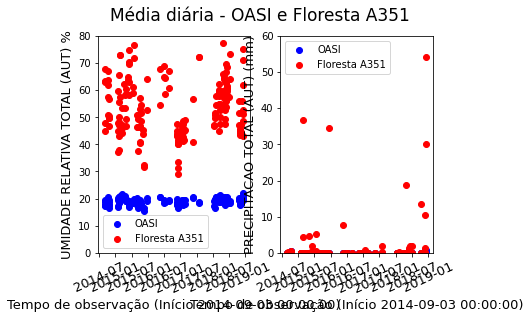

In [ ]:
plt.subplot(121)
plt.scatter(df_diario_OASI_Floresta['Datetime'], df_diario_OASI_Floresta['Hum (OASI)'], label = 'OASI',color = 'blue')
plt.scatter(df_diario_OASI_Floresta['Datetime'], df_diario_OASI_Floresta['Hum (Floresta)'], label = 'Floresta A351',color = 'red')
plt.xticks(rotation = 25, size = 13)
plt.ylabel('UMIDADE RELATIVA TOTAL (AUT) %', size = 13)
plt.xlabel('Tempo de observação' + ' (Início ' + str(df_diario_OASI_Floresta['Datetime'][0]) + ')', size = 13)
plt.ylim(0,80)
plt.legend()

plt.subplot(122)
plt.scatter(df_diario_OASI_Floresta['Datetime'], df_diario_OASI_Floresta['Rain (OASI)'], label = 'OASI',color = 'blue')
plt.scatter(df_diario_OASI_Floresta['Datetime'], df_diario_OASI_Floresta['Rain (Floresta)'], label = 'Floresta A351',color = 'red')
plt.xticks(rotation = 25, size = 13)
plt.ylabel('PRECIPITACAO TOTAL (AUT) (mm)', size = 13)
plt.xlabel('Tempo de observação' + ' (Início ' + str(df_diario_OASI_Floresta['Datetime'][0]) + ')', size = 13)
plt.ylim(0,60)
plt.legend()

plt.suptitle('Média diária - OASI e Floresta A351', size = 17)

plt.savefig('media_diaria_OASI-Floresta.png')
plt.show()

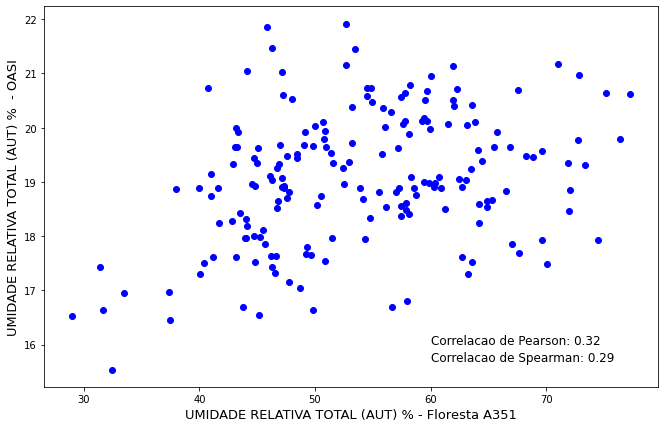

In [ ]:
#correlacao de pearson pelo scipy
corr_pearson_scipy, p_value_pearson = pearsonr(df_diario_OASI_Floresta['Hum (Floresta)'],
                               df_diario_OASI_Floresta['Hum (OASI)'])

#correlacao de spearman pelo scipy
corr_spearman_scipy, p_value_spearman = spearmanr(df_diario_OASI_Floresta['Hum (Floresta)'],
                               df_diario_OASI_Floresta['Hum (OASI)'])

corr_pearson_scipy = int(corr_pearson_scipy*100)/100
corr_spearman_scipy = int(corr_spearman_scipy*100)/100

#print('Correlacao de Pearson: {}'.format(corr_pearson_scipy))
#print('Correlacao de Spearman: {}'.format(corr_spearman_scipy))

plt.figure(figsize = (11,7))
plt.scatter(df_diario_OASI_Floresta['Hum (Floresta)'], df_diario_OASI_Floresta['Hum (OASI)'], color = 'blue')
pearson = 'Correlacao de Pearson: ' + str(corr_pearson_scipy)
spearman = 'Correlacao de Spearman: ' + str(corr_spearman_scipy)
plt.text(60,16, pearson, fontsize = 12)
plt.text(60,15.7, spearman, fontsize = 12)
plt.ylabel('UMIDADE RELATIVA TOTAL (AUT) %  - OASI', size = 13)
plt.xlabel('UMIDADE RELATIVA TOTAL (AUT) % - Floresta A351', size = 13)
plt.savefig('umidade-OASIxFloresta.png')
plt.show()

                 Hum (OASI)  Rain (OASI)  Rain (Floresta)  Hum (Floresta)
Hum (OASI)         1.000000     0.230847         0.201362        0.326819
Rain (OASI)        0.230847     1.000000         0.288256        0.150350
Rain (Floresta)    0.201362     0.288256         1.000000        0.312086
Hum (Floresta)     0.326819     0.150350         0.312086        1.000000


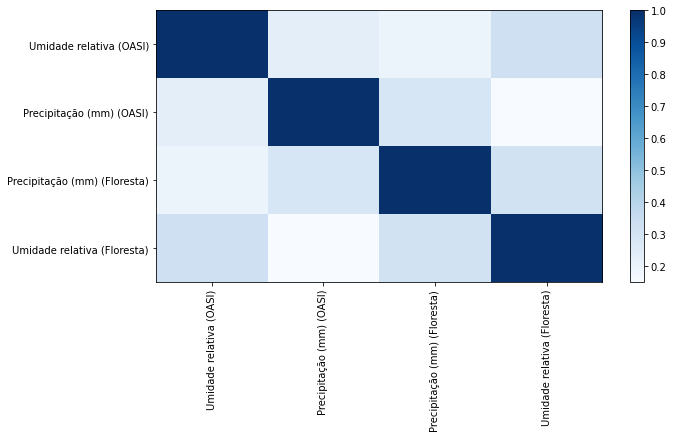

In [ ]:
# correlacao de pearson pelo pandas
corr = df_diario_OASI_Floresta.corr()
corr.to_csv('coeficiente_pearson_OASI-Floresta')
print(corr.head())

#diagrama de correlacao
plt.figure(figsize = (10,5))
plt.imshow(corr, cmap = 'Blues', interpolation = 'none', aspect = 'auto')
plt.colorbar()

corr.columns = ['Umidade relativa (OASI)', 'Precipitação (mm) (OASI)', 'Precipitação (mm) (Floresta)', 'Umidade relativa (Floresta)', ]
plt.xticks(range(len(corr)), corr.columns, rotation = 'vertical')
plt.yticks(range(len(corr)), corr.columns)

plt.savefig('correlacao_OASI-Floresta.png')
plt.show()

### **Seeing 2019**

In [ ]:
#seeing em 2019, imagens com 30s de exposicao
seeing_30 = pd.read_csv('/content/seeing_30s.csv', usecols = ['DATE-OBS','SEEING'])

seeing_30.columns = ['Datetime', 'Seeing']
seeing_30.to_csv('seeing-data_30s_R')

seeing_30.head()

,Datetime,Seeing
0,2019-04-05T23:25:06,1.181833
1,2019-04-06T00:00:20,1.203707
2,2019-04-06T01:00:28,1.181152
3,2019-04-06T02:14:52,1.477593
4,2019-04-06T02:47:09,1.200506


In [ ]:
#seeing em 2019, imagens com 40s de exposicao
seeing_40 = pd.read_csv('/content/seeing_40s.csv', usecols = ['DATE-OBS','SEEING'])

seeing_40.columns = ['Datetime', 'Seeing']

seeing_40.to_csv('seeing-data_40s_R')
seeing_40.head()

,Datetime,Seeing
0,2019-01-08T23:11:50,0.754727
1,2019-01-09T00:00:41,0.869891
2,2019-01-09T01:00:31,1.158670
3,2019-01-09T02:00:28,1.150532
4,2019-01-09T03:00:21,1.048416


In [ ]:
#transformando a coluna Datetime em objeto datetime do pandas para fazer o groupby
seeing_30.Datetime = pd.to_datetime(seeing_30.Datetime)
seeing_40.Datetime = pd.to_datetime(seeing_40.Datetime)

In [ ]:
#media diaria dos seeings em 2019 com 30 e 40s de tempo de exposicao
seeing_30_diario = seeing_30.groupby(by = seeing_30.Datetime.dt.date).mean()
seeing_40_diario = seeing_40.groupby(by = seeing_40.Datetime.dt.date).mean()


seeing_30_diario.to_csv('seeing-data_diario_30s_R')
seeing_40_diario.to_csv('seeing-data_diario_40s_R')

In [ ]:
(seeing_30_diario.info())
seeing_30_diario.head()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 2019-04-05 to 2019-12-04
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Seeing  25 non-null     float64
dtypes: float64(1)
memory usage: 400.0+ bytes


,Seeing
Datetime,
2019-04-05,1.181833
2019-04-06,1.265739
2019-04-08,1.123272
2019-07-05,1.401407
2019-07-06,1.157226


In [ ]:
(seeing_40_diario.info())
seeing_40_diario.head()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 2019-01-08 to 2019-10-26
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Seeing  34 non-null     float64
dtypes: float64(1)
memory usage: 544.0+ bytes


,Seeing
Datetime,
2019-01-08,0.754727
2019-01-09,1.067362
2019-01-10,0.899092
2019-01-11,1.047945
2019-01-13,1.222681


### **Seeing 2011-2018 (Rondon et al 2020)**

In [ ]:
seeing_OASI = pd.read_csv('/content/FWHMTotal_Total_Prueba.txt', delim_whitespace = True,
                               names = ['Datetime', '?', 'Objeto', 'FWHM', 'Seeing'])

del seeing_OASI['?']
del seeing_OASI['Objeto']
del seeing_OASI['FWHM']

seeing_OASI.to_csv('seeing_OASI_2011-2018')

print(seeing_OASI.info())
seeing_OASI.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22078 entries, 0 to 22077
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  22078 non-null  object 
 1   Seeing    22078 non-null  float64
dtypes: float64(1), object(1)
memory usage: 345.1+ KB
None


,Datetime,Seeing
0,2011-05-12T01:14:37,1.503684
1,2011-05-12T01:15:10,1.487708
2,2011-05-12T01:15:43,1.519978
3,2011-05-12T01:16:16,1.474059
4,2011-05-12T01:16:49,1.568380


In [ ]:
seeing_OASI.Datetime = pd.to_datetime(seeing_OASI.Datetime)

seeing_OASI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22078 entries, 0 to 22077
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  22078 non-null  datetime64[ns]
 1   Seeing    22078 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 345.1 KB


In [ ]:
seeing_OASI_diario = seeing_OASI.groupby(by = seeing_OASI.Datetime.dt.date).mean()
seeing_OASI_diario.head()

,Seeing
Datetime,
2011-05-12,1.496963
2011-06-24,0.954734
2011-06-25,0.907572
2011-06-27,2.034281
2011-06-28,0.917489


In [ ]:
seeing_OASI_diario = seeing_OASI_diario.reset_index()

seeing_OASI_diario.Datetime = pd.to_datetime(seeing_OASI_diario.Datetime)
print(seeing_OASI_diario.info())

seeing_OASI_diario.to_csv('seeing_data_OASI')

seeing_OASI_diario.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  230 non-null    datetime64[ns]
 1   Seeing    230 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.7 KB
None


,Datetime,Seeing
0,2011-05-12,1.496963
1,2011-06-24,0.954734
2,2011-06-25,0.907572
3,2011-06-27,2.034281
4,2011-06-28,0.917489


### **Dados meteorologicos + seeing**

In [ ]:
print(dados_dia.info())
dados_dia.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Datetime     200 non-null    datetime64[ns]
 1   Hum (OASI)   200 non-null    float64       
 2   Rain (OASI)  200 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 4.8 KB
None


,Datetime,Hum (OASI),Rain (OASI)
0,2014-09-03,19.632025,0.0
1,2014-09-04,18.822053,0.0
2,2014-09-05,17.611506,0.0
3,2014-09-06,17.684167,0.0
4,2014-09-07,17.304258,0.0


In [ ]:
df_meteo_seeing = seeing_OASI_diario.merge(dados_dia, on = 'Datetime')
df_meteo_seeing.to_csv('seeing_dados-meteor_OASI')

print(df_meteo_seeing.info())
df_meteo_seeing.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Datetime     20 non-null     datetime64[ns]
 1   Seeing       20 non-null     float64       
 2   Hum (OASI)   20 non-null     float64       
 3   Rain (OASI)  20 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 800.0 bytes
None


,Datetime,Seeing,Hum (OASI),Rain (OASI)
0,2014-09-03,1.092224,19.632025,0.0
1,2014-09-04,1.698317,18.822053,0.0
2,2015-03-14,0.859240,21.475000,0.0
3,2015-04-13,2.041861,20.785740,0.0
4,2015-04-14,1.034545,20.382462,0.0


In [ ]:
df_meteo_seeing.columns = ['Datetime', 'Seeing', 'Umidade', 'Precipitção']

In [ ]:
umidade_16_17 = df_meteo_seeing.loc[(df_meteo_seeing['Umidade'] > 16) & (df_meteo_seeing['Umidade'] <= 17)]
#umidade_16_17.set_index('Datetime', inplace = True)

umidade_17_18 = df_meteo_seeing.loc[(df_meteo_seeing['Umidade'] > 17) & (df_meteo_seeing['Umidade'] <= 18)]
#umidade_17_18.set_index('Datetime', inplace = True)

umidade_18_19 = df_meteo_seeing.loc[(df_meteo_seeing['Umidade'] > 18) & (df_meteo_seeing['Umidade'] <= 19)]
#umidade_18_19.set_index('Datetime', inplace = True)

umidade_19_20 = df_meteo_seeing.loc[(df_meteo_seeing['Umidade'] > 19) & (df_meteo_seeing['Umidade'] <= 20)]
#umidade_19_20.set_index('Datetime', inplace = True)

umidade_20_21 = df_meteo_seeing.loc[(df_meteo_seeing['Umidade'] > 20) & (df_meteo_seeing['Umidade'] <= 21)]
#umidade_20_21.set_index('Datetime', inplace = True)

umidade_21 = df_meteo_seeing.loc[(df_meteo_seeing['Umidade'] > 21)]
#umidade_21.set_index('Datetime', inplace = True)

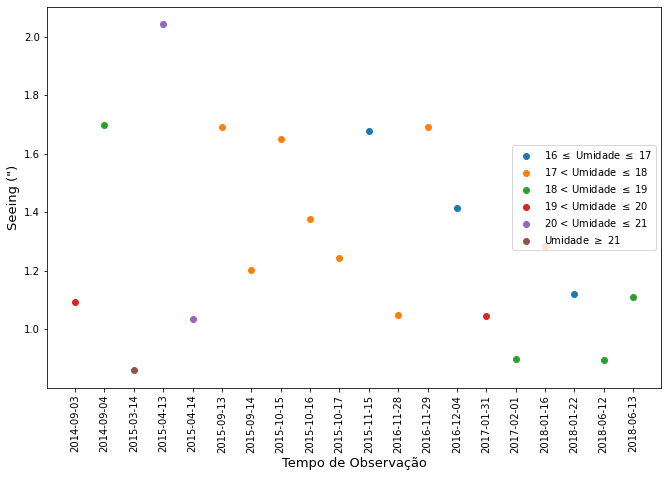

In [ ]:
plt.figure(figsize = (11,7))


#plt.scatter(list(df_meteo_seeing['Datetime'].astype('str')), list(df_meteo_seeing['Seeing']))


plt.scatter(x = list(umidade_16_17['Seeing'].index.values), y = umidade_16_17['Seeing'],
            label = r'16 $\leq$ Umidade $\leq$ 17')

plt.scatter(x = list(umidade_17_18['Seeing'].index.values),
            y = umidade_17_18['Seeing'], label = r'17 < Umidade $\leq$ 18')

plt.scatter(x = list(umidade_18_19['Seeing'].index.values),
            y = umidade_18_19['Seeing'], label = r'18 < Umidade $\leq$ 19')

plt.scatter(x = list(umidade_19_20['Seeing'].index.values),
            y = umidade_19_20['Seeing'], label = r'19 < Umidade $\leq$ 20')

plt.scatter(x = list(umidade_20_21['Seeing'].index.values),
            y = umidade_20_21['Seeing'], label = r'20 < Umidade $\leq$ 21')

plt.scatter(x = list(umidade_21['Seeing'].index.values), y = umidade_21['Seeing'], label = r'Umidade $\geq$ 21')


A0 = ['2014-09-03', '2014-09-04', '2015-03-14', '2015-04-13',
      '2015-04-14', '2015-09-13', '2015-09-14', '2015-10-15',
      '2015-10-16', '2015-10-17', '2015-11-15', '2016-11-28',
      '2016-11-29', '2016-12-04', '2017-01-31', '2017-02-01',
      '2018-01-16', '2018-01-22', '2018-06-12', '2018-06-13']
#sns.scatterplot(data = df_meteo_seeing, x = A0, y = 'Seeing', hue = 'Umidade', hue_norm = (16,21), legend = 'brief', palette = 'deep')

plt.xticks(ticks = np.arange(20), labels = A0, rotation = 90)
plt.ylabel('Seeing (")', size = 13)
plt.xlabel("Tempo de Observação", size = 13)
plt.legend(loc = 'center right')
plt.savefig('seeing_dados-meteorxtempo.png')

### **Seeing 2011-2019**

In [ ]:
seeing_OASI_diario.head()

,Datetime,Seeing
0,2011-05-12,1.496963
1,2011-06-24,0.954734
2,2011-06-25,0.907572
3,2011-06-27,2.034281
4,2011-06-28,0.917489


In [ ]:
seeing_OASI_diario.dtypes

Datetime    datetime64[ns]
Seeing             float64
dtype: object

In [ ]:
seeing_30_diario.reset_index(inplace = True)
seeing_40_diario.reset_index(inplace = True)

In [ ]:
seeing_30_diario.Datetime = pd.to_datetime(seeing_30_diario.Datetime)
seeing_40_diario.Datetime = pd.to_datetime(seeing_40_diario.Datetime)

In [ ]:
print(seeing_30_diario.head())
seeing_30_diario.dtypes

    Datetime    Seeing
0 2019-04-05  1.181833
1 2019-04-06  1.265739
2 2019-04-08  1.123272
3 2019-07-05  1.401407
4 2019-07-06  1.157226


Datetime    datetime64[ns]
Seeing             float64
dtype: object

In [ ]:
print(seeing_40_diario.head())
seeing_40_diario.dtypes

    Datetime    Seeing
0 2019-01-08  0.754727
1 2019-01-09  1.067362
2 2019-01-10  0.899092
3 2019-01-11  1.047945
4 2019-01-13  1.222681


Datetime    datetime64[ns]
Seeing             float64
dtype: object

In [ ]:
df_seeing_2011_2019 = pd.concat([seeing_OASI_diario,seeing_30_diario, seeing_40_diario], axis = 0, ignore_index=False)

df_seeing_2011_2019.to_csv('seeing_OASI_2011-2019')
df_seeing_2011_2019.head()

,Datetime,Seeing
0,2011-05-12,1.496963
1,2011-06-24,0.954734
2,2011-06-25,0.907572
3,2011-06-27,2.034281
4,2011-06-28,0.917489


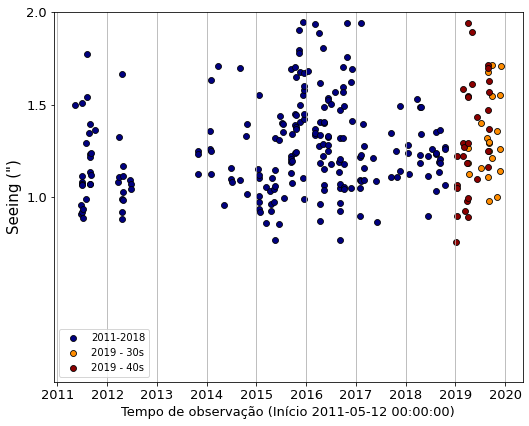

In [ ]:
plt.figure(figsize = (8.4,6.8))

plt.scatter(seeing_OASI_diario.Datetime, seeing_OASI_diario.Seeing, color = 'navy', label = '2011-2018', alpha = 1,lw = 0.8,edgecolor = 'black')
plt.scatter(seeing_30_diario.Datetime, seeing_30_diario.Seeing, color = 'darkorange', label = '2019 - 30s', alpha = 1,lw = 0.8,edgecolor = 'black')
plt.scatter(seeing_40_diario.Datetime, seeing_40_diario.Seeing, color = 'darkred', label = '2019 - 40s', alpha = 1,lw = 0.8,edgecolor = 'black')

plt.ylim(bottom = 0, top = 1.5)
plt.yticks(np.arange(1,2.5,0.5),size = 13)
plt.ylabel('Seeing (")', size = 15)

plt.xticks(size = 13)
plt.xlabel('Tempo de observação' + ' (Início ' + str(seeing_OASI_diario['Datetime'][0]) + ')', size = 13)

plt.grid(axis = 'x')
plt.legend()


plt.savefig('seeing_OASI_2011-2019.png')
plt.show()

In [ ]:
seeing_OASI_diario_2011 = seeing_OASI_diario.set_index('Datetime').filter(like = '2011', axis = 0).reset_index()
seeing_OASI_diario_2012 = seeing_OASI_diario.set_index('Datetime').filter(like = '2012', axis = 0).reset_index()
seeing_OASI_diario_2013 = seeing_OASI_diario.set_index('Datetime').filter(like = '2013', axis = 0).reset_index()
seeing_OASI_diario_2014 = seeing_OASI_diario.set_index('Datetime').filter(like = '2014', axis = 0).reset_index()
seeing_OASI_diario_2015 = seeing_OASI_diario.set_index('Datetime').filter(like = '2015', axis = 0).reset_index()
seeing_OASI_diario_2016 = seeing_OASI_diario.set_index('Datetime').filter(like = '2016', axis = 0).reset_index()
seeing_OASI_diario_2017 = seeing_OASI_diario.set_index('Datetime').filter(like = '2017', axis = 0).reset_index()
seeing_OASI_diario_2018 = seeing_OASI_diario.set_index('Datetime').filter(like = '2018', axis = 0).reset_index()

In [ ]:
seeing_OASI_diario_2012.dtypes

Datetime    datetime64[ns]
Seeing             float64
dtype: object

In [ ]:
#seeing_OASI_diario_2011.Datetime = pd.to_datetime(seeing_OASI_diario_2011.Datetime)
seeing_OASI_diario_2011.Datetime = Time(seeing_OASI_diario_2011.Datetime, scale = 'utc')
seeing_OASI_diario_2012.Datetime = Time(seeing_OASI_diario_2012.Datetime, scale = 'utc')
seeing_OASI_diario_2013.Datetime = Time(seeing_OASI_diario_2013.Datetime, scale = 'utc')
seeing_OASI_diario_2014.Datetime = Time(seeing_OASI_diario_2014.Datetime, scale = 'utc')
seeing_OASI_diario_2015.Datetime = Time(seeing_OASI_diario_2015.Datetime, scale = 'utc')
seeing_OASI_diario_2016.Datetime = Time(seeing_OASI_diario_2016.Datetime, scale = 'utc')
seeing_OASI_diario_2017.Datetime = Time(seeing_OASI_diario_2017.Datetime, scale = 'utc')
seeing_OASI_diario_2018.Datetime = Time(seeing_OASI_diario_2018.Datetime, scale = 'utc')

In [ ]:
seeing_OASI_diario_2011.head()

,Datetime,Seeing
0,2011-05-12T00:00:00.000000000,1.496963
1,2011-06-24T00:00:00.000000000,0.954734
2,2011-06-25T00:00:00.000000000,0.907572
3,2011-06-27T00:00:00.000000000,2.034281
4,2011-06-28T00:00:00.000000000,0.917489


In [ ]:
it = Time('2011-01-01T00:00:00.000000000', format = 'isot' ,scale = 'utc')
dt_2011 = [(i - it).value/30 for i in (seeing_OASI_diario_2011['Datetime'])]

it = Time('2012-01-01T00:00:00.000000000', format = 'isot' ,scale = 'utc')
dt_2012 = [(i - it).value/30 for i in (seeing_OASI_diario_2012['Datetime'])]

it = Time('2013-01-01T00:00:00.000000000', format = 'isot' ,scale = 'utc')
dt_2013 = [(i - it).value/30 for i in (seeing_OASI_diario_2013['Datetime'])]

it = Time('2014-01-01T00:00:00.000000000', format = 'isot' ,scale = 'utc')
dt_2014 = [(i - it).value/30 for i in (seeing_OASI_diario_2014['Datetime'])]

it = Time('2015-01-01T00:00:00.000000000', format = 'isot' ,scale = 'utc')
dt_2015 = [(i - it).value/30 for i in (seeing_OASI_diario_2015['Datetime'])]

it = Time('2016-01-01T00:00:00.000000000', format = 'isot' ,scale = 'utc')
dt_2016 = [(i - it).value/30 for i in (seeing_OASI_diario_2016['Datetime'])]

it = Time('2017-01-01T00:00:00.000000000', format = 'isot' ,scale = 'utc')
dt_2017 = [(i - it).value/30 for i in (seeing_OASI_diario_2017['Datetime'])]

it = Time('2018-01-01T00:00:00.000000000', format = 'isot' ,scale = 'utc')
dt_2018 = [(i - it).value/30 for i in (seeing_OASI_diario_2018['Datetime'])]

In [ ]:
seeing_30_diario.head()

,Datetime,Seeing
0,2019-04-05,1.181833
1,2019-04-06,1.265739
2,2019-04-08,1.123272
3,2019-07-05,1.401407
4,2019-07-06,1.157226


In [ ]:
seeing_30_diario.Datetime = Time(seeing_30_diario.Datetime, scale = 'utc')
seeing_40_diario.Datetime = Time(seeing_40_diario.Datetime, scale = 'utc')

In [ ]:
it = Time('2019-01-01T00:00:00.000000000', format = 'isot' ,scale = 'utc')
dt_2019_30 = [(i - it).value/30 for i in (seeing_30_diario['Datetime'])]
dt_2019_40 = [(i - it).value/30 for i in (seeing_40_diario['Datetime'])]

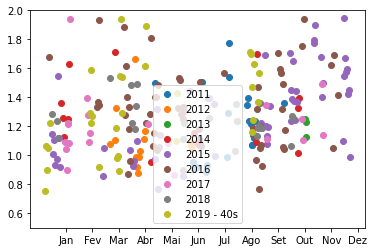

In [ ]:
plt.scatter(dt_2011,seeing_OASI_diario_2011['Seeing'], label = '2011')
plt.scatter(dt_2012,seeing_OASI_diario_2012['Seeing'], label = '2012')
plt.scatter(dt_2013,seeing_OASI_diario_2013['Seeing'], label = '2013')
plt.scatter(dt_2014,seeing_OASI_diario_2014['Seeing'], label = '2014')
plt.scatter(dt_2015,seeing_OASI_diario_2015['Seeing'], label = '2015')
plt.scatter(dt_2016,seeing_OASI_diario_2016['Seeing'], label = '2016')
plt.scatter(dt_2017,seeing_OASI_diario_2017['Seeing'], label = '2017')
plt.scatter(dt_2018,seeing_OASI_diario_2018['Seeing'], label = '2018')
plt.scatter(dt_2019_40,seeing_40_diario['Seeing']    , label = '2019 - 40s')
plt.xticks(np.arange(1,13,1), ['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'])
plt.ylim(0.5,2)
plt.legend(loc = 'lower center')

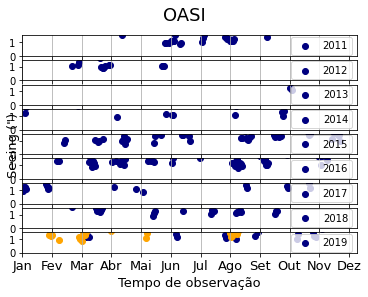

In [ ]:
fig, ax = plt.subplots(9,1, sharex = True, sharey = False)

ax[0].scatter(dt_2011, seeing_OASI_diario_2011['Seeing'], label = '2011', color = 'navy' )
ax[0].legend(['2011'], loc = 'right')
ax[0].grid(axis = 'x')


ax[1].scatter(dt_2012, seeing_OASI_diario_2012.Seeing, label = '2012', color = 'navy' )
ax[1].legend(['2012'], loc = 'right')
ax[1].grid(axis = 'x')


ax[2].scatter(dt_2013, seeing_OASI_diario_2013.Seeing, label = '2013', color = 'navy' )
ax[2].legend(['2013'], loc = 'right')
ax[2].grid(axis = 'x')


ax[3].scatter(dt_2014, seeing_OASI_diario_2014.Seeing, label = '2014', color = 'navy' )
ax[3].legend(['2014'], loc = 'right')
ax[3].grid(axis = 'x')


ax[4].scatter(dt_2015, seeing_OASI_diario_2015.Seeing, label = '2015', color = 'navy' )
ax[4].legend(['2015'], loc = 'right')
ax[4].grid(axis = 'x')


ax[5].scatter(dt_2016, seeing_OASI_diario_2016.Seeing, label = '2016', color = 'navy' )
ax[5].legend(['2016'], loc = 'right')
ax[5].grid(axis = 'x')


ax[6].scatter(dt_2017, seeing_OASI_diario_2017.Seeing, label = '2017', color = 'navy' )
ax[6].legend(['2017'], loc = 'right')
ax[6].grid(axis = 'x')


ax[7].scatter(dt_2018, seeing_OASI_diario_2018.Seeing, label = '2018', color = 'navy' )
ax[7].legend(['2018'], loc = 'right')
ax[7].grid(axis = 'x')


ax[8].scatter(dt_2019_30, seeing_30_diario.Seeing, label = '30s - 2019', color = 'navy' )
ax[8].scatter(dt_2019_40, seeing_40_diario.Seeing, label = '40s - 2019', color = 'orange' )
ax[8].set_xlim(1)
ax[8].set_xticks(np.arange(1,13,1))
ax[8].set_xticklabels(['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'], size = 13)
ax[8].set_xlabel('Tempo de observação', size = 13)

ax[8].legend(['2019'], loc = 'right')
ax[8].grid(axis = 'x')

plt.setp(ax, ylim = (0,1.5))
fig.text(0.09,0.5,'Seeing (")', va = 'center', rotation='vertical', size = 13)
fig.suptitle('OASI', size = 18)
plt.savefig('seeingxtempo_2011-2019.png')

# **Dados OASI (PLOTLY)**

In [ ]:
dados_dia['Rain'].iplot(kind = 'scatter',
                        title = 'OASI - Média diária',
                        xTitle = 'Data da observação',
                        yTitle = 'Precipitação total (AUT) (mm)',
                        mode = 'markers')
#dados_dia['Hum'].plot()